In [1]:
import pickle
import dill
import numpy as np
import pandas as pd
import pymc3 as pm 
from math import ceil

from collections import defaultdict, Counter

import utils
from talkpages import WikiCorpusReader, WikiCorpus
from alignment import Alignment

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TOPICS = [
          'religion',
          'science', 
          'linguistics', 
          'politics', 
          'history', 
          'people'
#           'philosophy', 
#           'sports',
          
#           'psychiatry',
#           'environment'
]

In [3]:
META_CATEGORIES = {'stylistic': [
                        'articles',
                        'negations',
                        'prepositions',
                        'numbers',
                        'pronouns'
                    ], 
                    'rhetoric': [
                        'tentative',   
                        'certainty',
                        'discrepancy',
                        'inclusive',
                        'exclusive'
                    ],
                    'discursive': [
                        'causation',
                        'insight',
                        'inhibition',
                        'communication',
                        'cognitive process',
                        'sensory process',
                        'motion'
                    ],
                    'stance': [
                        'optimism',
                        'anger',
                        'anxiety',
                        'sadness',
                    ]}


# Keep a list of category names for convenience.
CATEGORY_LIST = []
for cats in META_CATEGORIES.values():
    CATEGORY_LIST.extend(cats)

    
# Load the filtered lists of markers. 
with open('../../data/liwc/final.dict', 'rb') as f:
    MARKER_DICT = pickle.load(f)
    
    marker_list = []
    for markers in MARKER_DICT.values():
        marker_list.extend(markers)
    MARKER_LIST = list(set(marker_list))
    
    

plt.rcParams.update({'font.size': 14})

### SWAM Categorical

### $\eta^{base}$

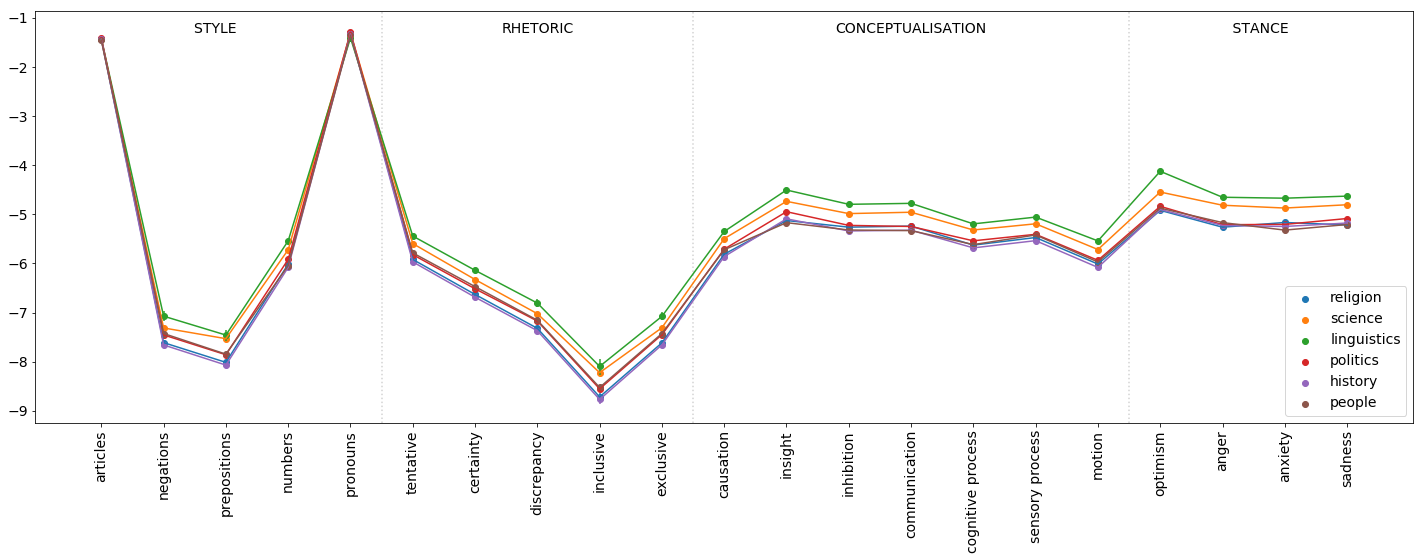

In [4]:
ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/swam/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['baseline intercept'])
        lo, hi = pm.stats.hpd(trace['baseline intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

ax.legend(loc=4)
plt.xticks(rotation=90)

# ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = -1.3
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()

At a first glance, the estimated baseline paratemers $\eta^{base}$ seem to take similar values across all topics, with the exception of philosophy and psychiatry, which show high variance for some stylistic and rhetoric categories. We replot $\eta^{base}$ without these two categories, which turn out to be the ones with the lowest number of users and posts.

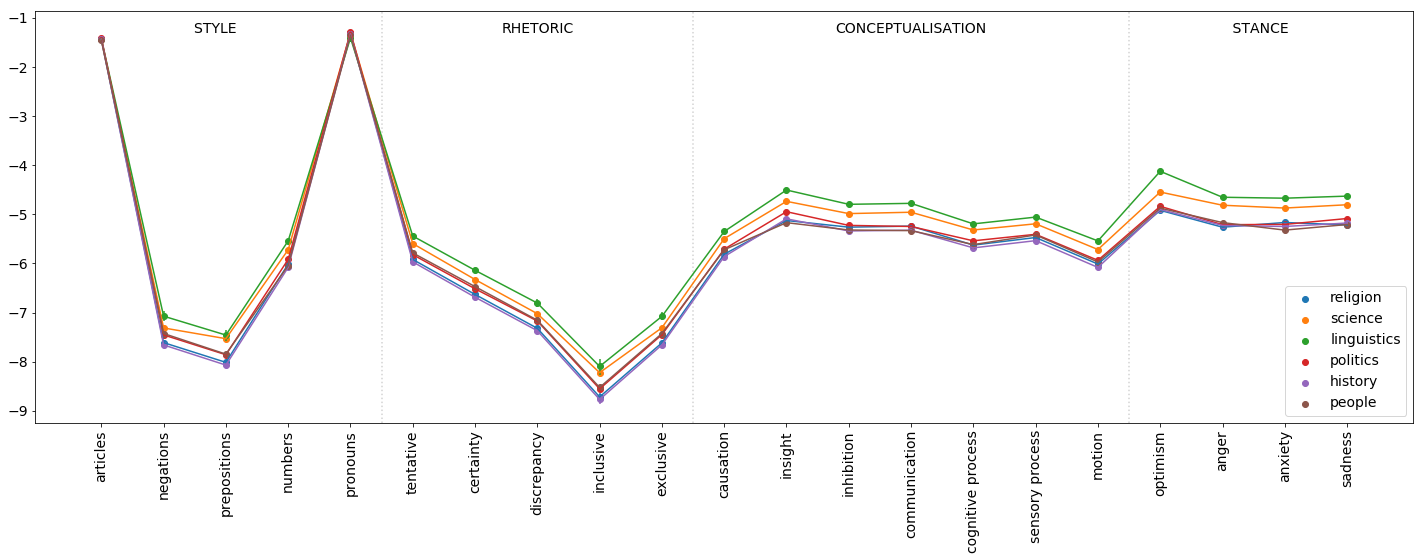

In [5]:
# TOPICS = [
#           'religion',
#           'science', 
#           'politics', 
#           'history', 
#           'people',
# #           'philosophy', 
# #           'sports',
#           'linguistics', 
# #           'psychiatry',
#           'environment'
# ]


ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/swam/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['baseline intercept'])
        lo, hi = pm.stats.hpd(trace['baseline intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    
ax.legend(loc=4)
plt.xticks(rotation=90)

# ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = -1.3
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('swam_baseline_intercept.pdf')

We can confirm that the trend is similar across topics but we notice clearer differences in conceptualisation and stance markers, which as predicted tend to be more topic related. 7 out of the 11 conceptualisation and stance markers show significant differences between linguistics, science, and the remaining topics. All of them exhibit significant differences between the pair science-linguistics and the other topics. As can be seen below:

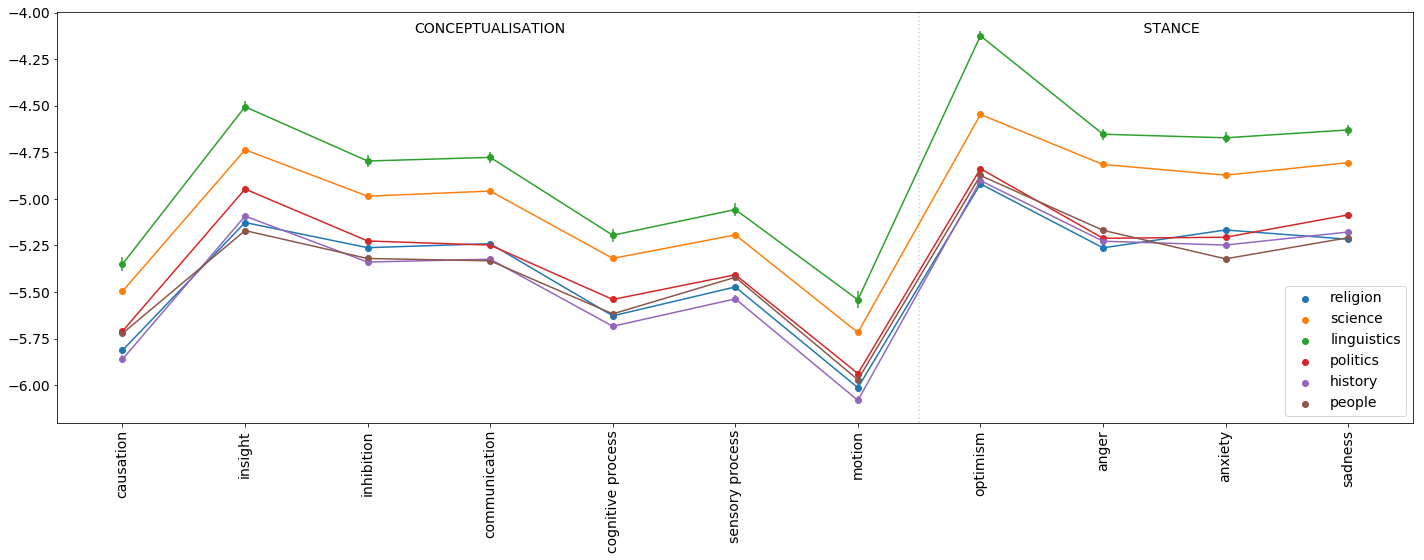

In [6]:
META_CATEGORIES = { 'discursive': [
                        'causation',
                        'insight',
                        'inhibition',
                        'communication',
                        'cognitive process',
                        'sensory process',
                        'motion'
                    ],
                    'stance': [
                        'optimism',
                        'anger',
                        'anxiety',
                        'sadness',
                    ]}

# Keep a list of category names for convenience.
CATEGORY_LIST = []
for cats in META_CATEGORIES.values():
    CATEGORY_LIST.extend(cats)

    
# Load the filtered lists of markers. 
with open('../../data/liwc/final.dict', 'rb') as f:
    MARKER_DICT = pickle.load(f)
    
    marker_list = []
    for markers in MARKER_DICT.values():
        marker_list.extend(markers)
    MARKER_LIST = list(set(marker_list))
    
ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/swam/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['baseline intercept'])
        lo, hi = pm.stats.hpd(trace['baseline intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    
ax.legend(loc=4)
plt.xticks(rotation=90)

ax.axvline(x=6.5, linestyle=':', color='lightgrey')

y_ = -4.11
ax.text(x=3, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=8.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('swam_baseline_intercept_conceptstance.pdf')

### $\eta^{align}$

In [7]:
META_CATEGORIES = {'stylistic': [
                        'articles',
                        'negations',
                        'prepositions',
                        'numbers',
                        'pronouns'
                    ], 
                    'rhetoric': [
                        'tentative',   
                        'certainty',
                        'discrepancy',
                        'inclusive',
                        'exclusive'
                    ],
                    'discursive': [
                        'causation',
                        'insight',
                        'inhibition',
                        'communication',
                        'cognitive process',
                        'sensory process',
                        'motion'
                    ],
                    'stance': [
                        'optimism',
                        'anger',
                        'anxiety',
                        'sadness',
                    ]}

# TOPICS = [
#           'religion',
#           'science', 
#           'politics', 
#           'history', 
#           'people',
# #           'philosophy', 
# #           'sports',
#           'linguistics', 
# #           'psychiatry',
# #           'environment'
# ]

# Keep a list of category names for convenience.
CATEGORY_LIST = []
for cats in META_CATEGORIES.values():
    CATEGORY_LIST.extend(cats)

    
# Load the filtered lists of markers. 
with open('../../data/liwc/final.dict', 'rb') as f:
    MARKER_DICT = pickle.load(f)
    
    marker_list = []
    for markers in MARKER_DICT.values():
        marker_list.extend(markers)
    MARKER_LIST = list(set(marker_list))

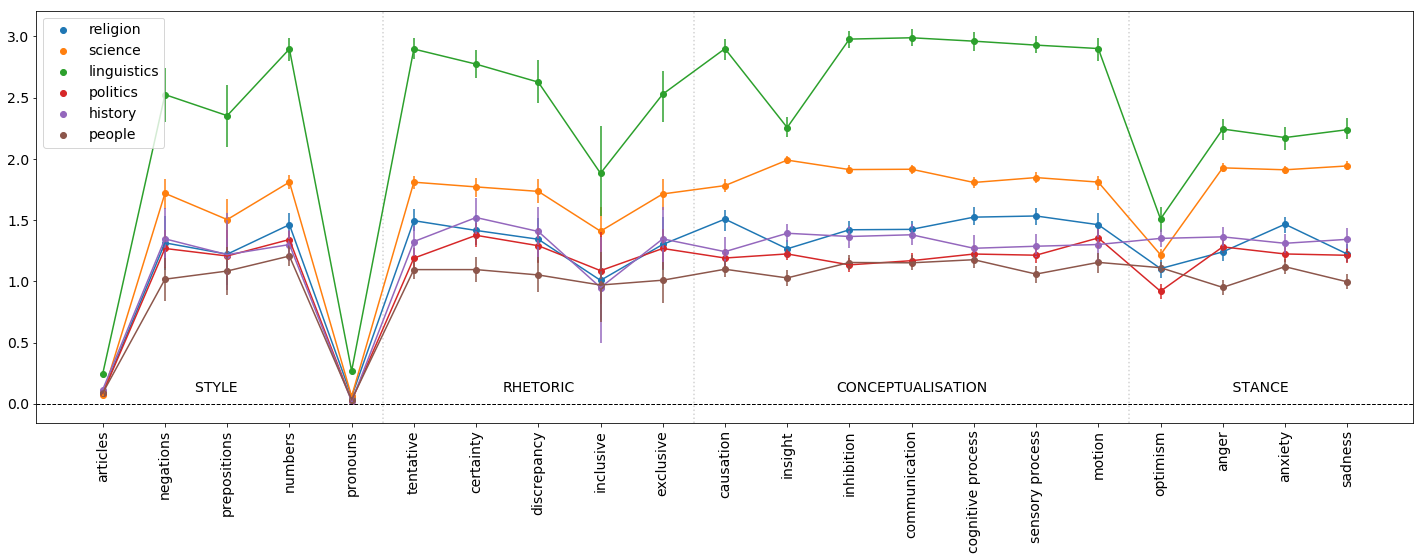

In [8]:
ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/swam/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['alignment intercept'])
        lo, hi = pm.stats.hpd(trace['alignment intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

ax.legend(loc=2)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.1
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('swam_align_intercept.pdf')

Most categories exhibit significant alignment. Pronouns mostly do not and together with articles show the lowest alignment values. Linguistics and science differentiate themselves and show the highest alignment values. We find the highest amount of significant differences across topics in the alignment with respect to conceptualisation markers. 
Examining the topic-specific trajectories, we can notice that conversations about religious topics, which otherwise form a group with politics, history, and people, show significantly higher alignment than the latter three when it comes to markers of causation, cognitive and sensory process as well as anxiety, making it more similar to the values of linguistics and science. In a specular manner, conversations about groups of people or famous individuals and groups (people) show significantly lower alignment values in markers of certainty, insight, sensory process, anger and sadness.

### Social structure: dyadic tie strength

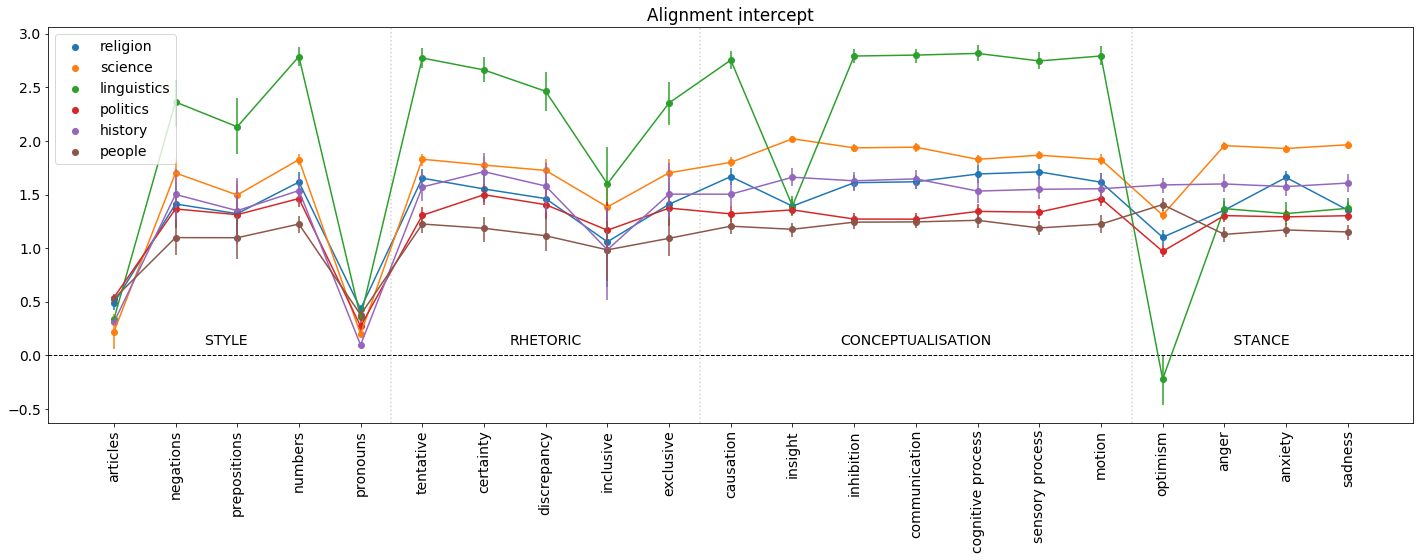

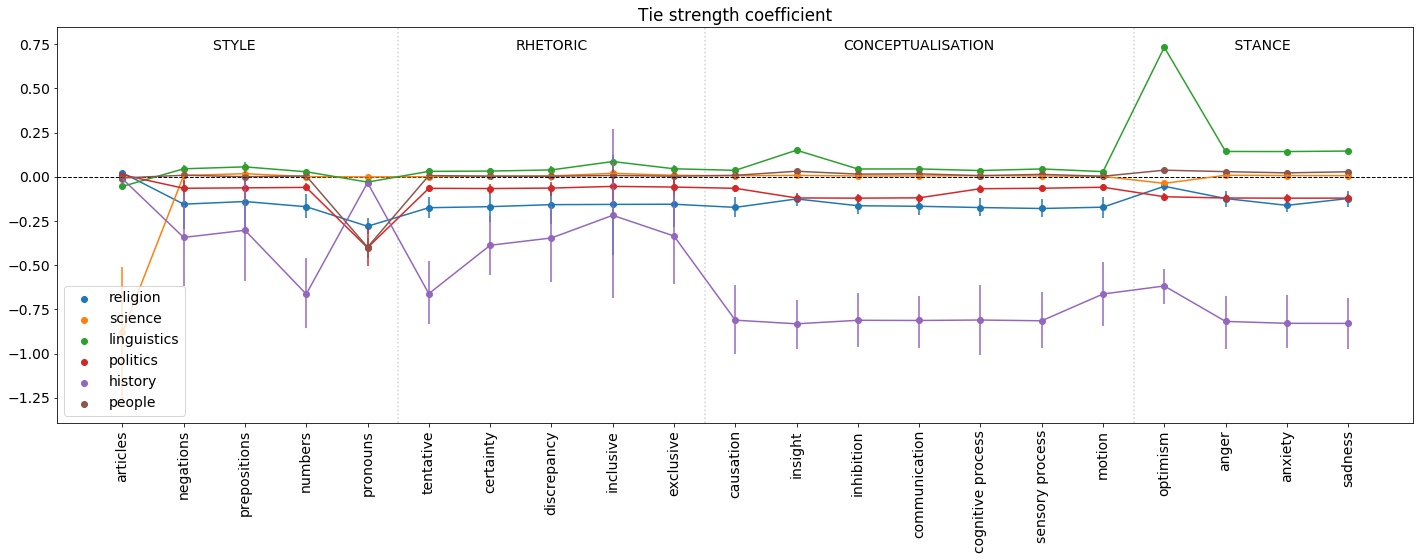

In [9]:
ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/tiestrength/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['alignment intercept'])
        lo, hi = pm.stats.hpd(trace['alignment intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title('Alignment intercept')
ax.legend(loc=2)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.1
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('tiestr_alignment_intercept.pdf')

fig, ax = plt.subplots(figsize=(20, 8))

for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/tiestrength/{}-{}.csv'.format(TOPIC, CAT))
    
        mean = np.mean(trace['coefficient tie-strength'])
        lo, hi = pm.stats.hpd(trace['coefficient tie-strength'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title('Tie strength coefficient')
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.72
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('tiestr_coefficient.pdf')

The overall tendency is that alignment mostly occurs regardless of tie strength. The most evident exception concerns alignment in the use of optimism markers in linguistic conversations: non-significant divergent accommodation is shown for optimism yet strongly tied individuals align heavily with respect to them.

The logistic regression model allows us to analyse how the importance of tie strength varies across topics. Linguistics is the only topic that shows a somewhat consistent tendency of users to align to individuals they know well.  Tie strength is the least influential when it comes to conversations about people and science. In talks on politics, religion, and in particular history (which tended to form a coherent group for $\eta^{align}$ as well), tie strength exherts a strong influence across marker types. Against our predictions, a speaker's tendency to align is inversely proportional to the strength of the tie with their interlocutor. A possible explanation relates to the fact that these topics elicit individuals' most engrained beliefs. Political ideals, religious beliefs, different perspectives on history are an easy camp for disputes. To avoid breaking an already weak tie or to conquer the trust of a still not well known individual, speakers tend to align more strongly.

Finally, once again, the largest number of significant differences in alignment values across topics as well as the most extreme alignment values appear for markers of conceptualisations and stance. This result seems to confirm what we theorised: that these types of markers reveal the influence not only of immediate but also of  socio-historical context -- as predicted by CAT.

### Social relevance: network centrality

#### Eigenvector centrality

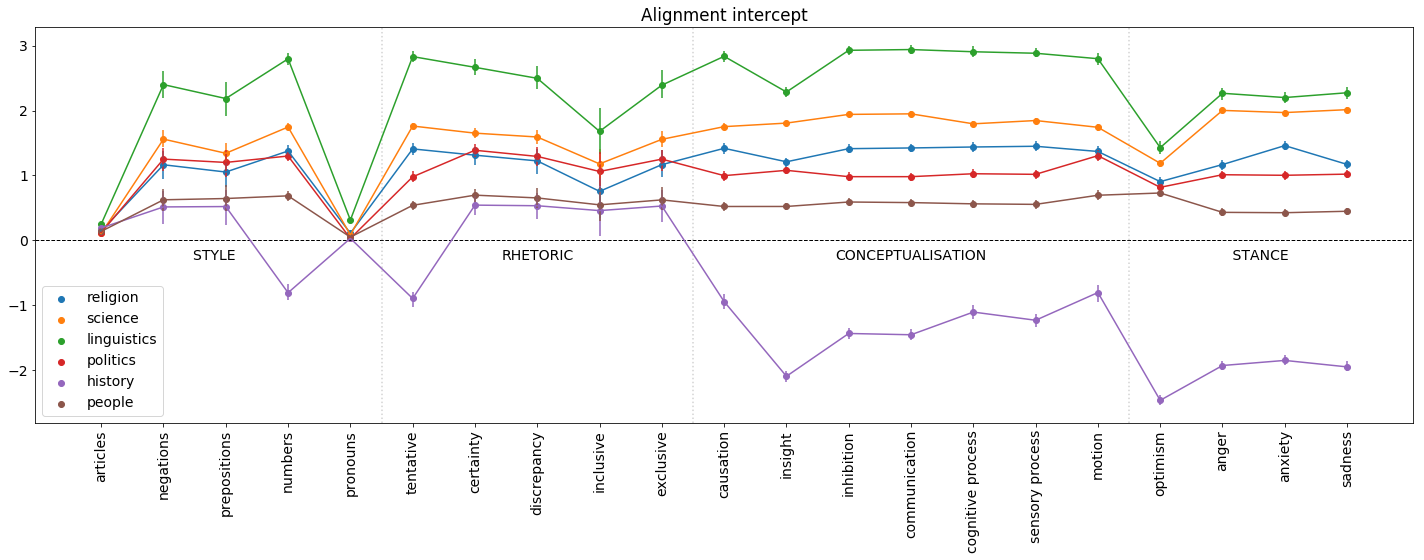

In [10]:
ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/eigenvector/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['alignment intercept'])
        lo, hi = pm.stats.hpd(trace['alignment intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title('Alignment intercept')
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = - 0.3
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('eigen_alignment_intercept.pdf')

We start from the alignment intercept, which now shows the clearest differences differences across topics. Conceptualisation and stance markers could be used to reliably tell apart topics as almost all pairwise inter-topic comparisons of alignment terms show significant differences. Surprisingly, coversations on history give place to divergent alignment when we extrapolate the influence of the interlocutors' centrality.

At this stage, a consideration can also be made with regard to alignment in conversation on linguistics. Utterances about this topic exhibit the highest alignment estimates throughout our analysis. We speculate that this tendency may be related to the fact that individuals who speak about linguistics are likely to better master the ability to accommodate using language as a consequence of their pronounced linguistic awareness.

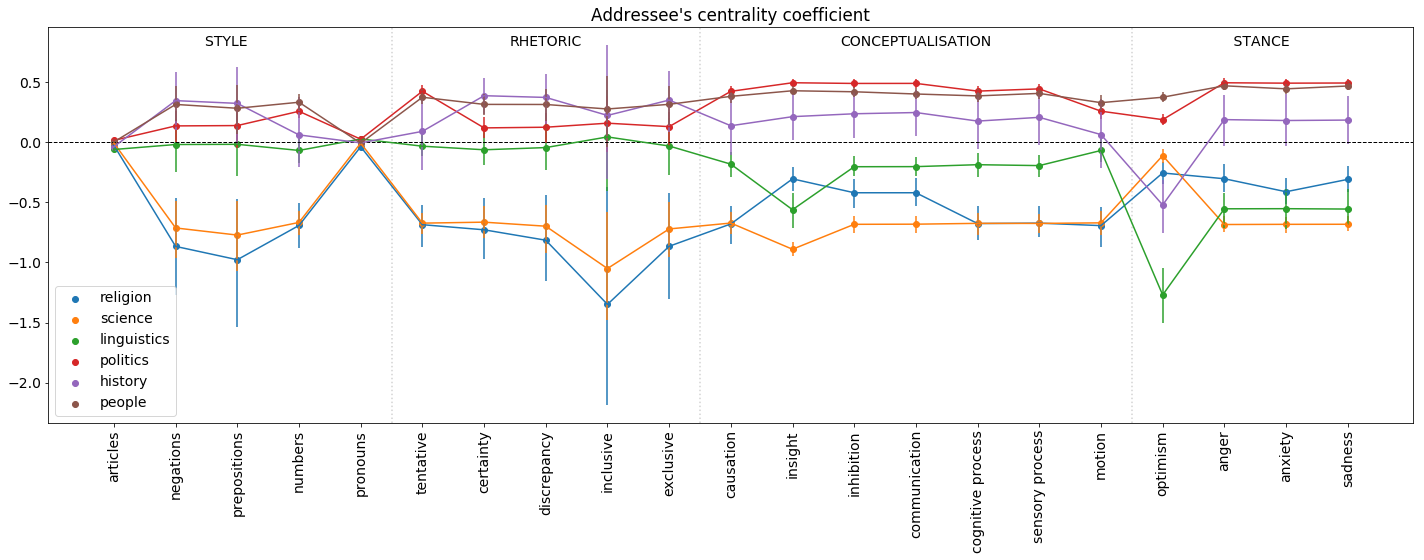

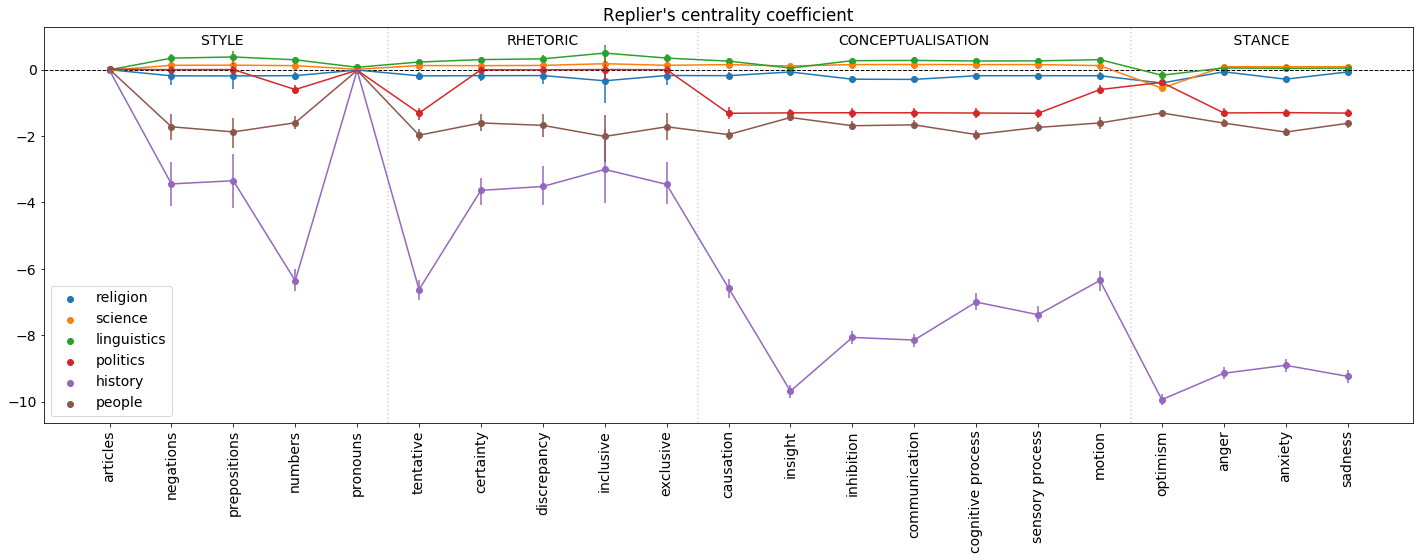

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))

for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/eigenvector/{}-{}.csv'.format(TOPIC, CAT))

        mean = np.mean(trace['coefficient centr(A)'])
        lo, hi = pm.stats.hpd(trace['coefficient centr(A)'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title("Addressee's centrality coefficient")
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.8
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('eigenvector_alignment_addressee.pdf')


fig, ax = plt.subplots(figsize=(20, 8))

for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/eigenvector/{}-{}.csv'.format(TOPIC, CAT))
    
        mean = np.mean(trace['coefficient centr(B)'])
        lo, hi = pm.stats.hpd(trace['coefficient centr(B)'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title("Replier's centrality coefficient")
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.75
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('eigenvector_alignment_replier.pdf')

The most evident point to make is that the centrality of the addressee plays a different role from the replier's centrality. 

Our hypothesis that speakers align more towards individuals that occupy a more central position in the same social network is only always true in conversations about politics, people, and partly history. Indeed the influence of the addressee's centrality can be both positive and negative according to the topic and the latter case is true for religious and scientific threads (including, in the case of conceptual and stance markers, threads on linguistics). We speculate that when they discuss these topics, speakers tend to align to peripheral individuals as an attempt to connect them to their social group, i.e. as a group membership negotiation stragegy (see CAT).

On the other hand, we hypothesised that speakers in more peripheral social network positions align more than central speakers. This is true for all topics but linguistics and science. In threads about scientific matters, the tendency to align grows proportionally to the speaker's centrality. This result partially confirms our previous speculation that in such formal topics it is central users who accommodate to negotiate the addressee's entrance in their topic-specific social circles. 
History, people, and mostly also politics and religion threads confirm our initial hypothesis.

#### Betweenness centrality

This notion of centrality yields very similar results. 

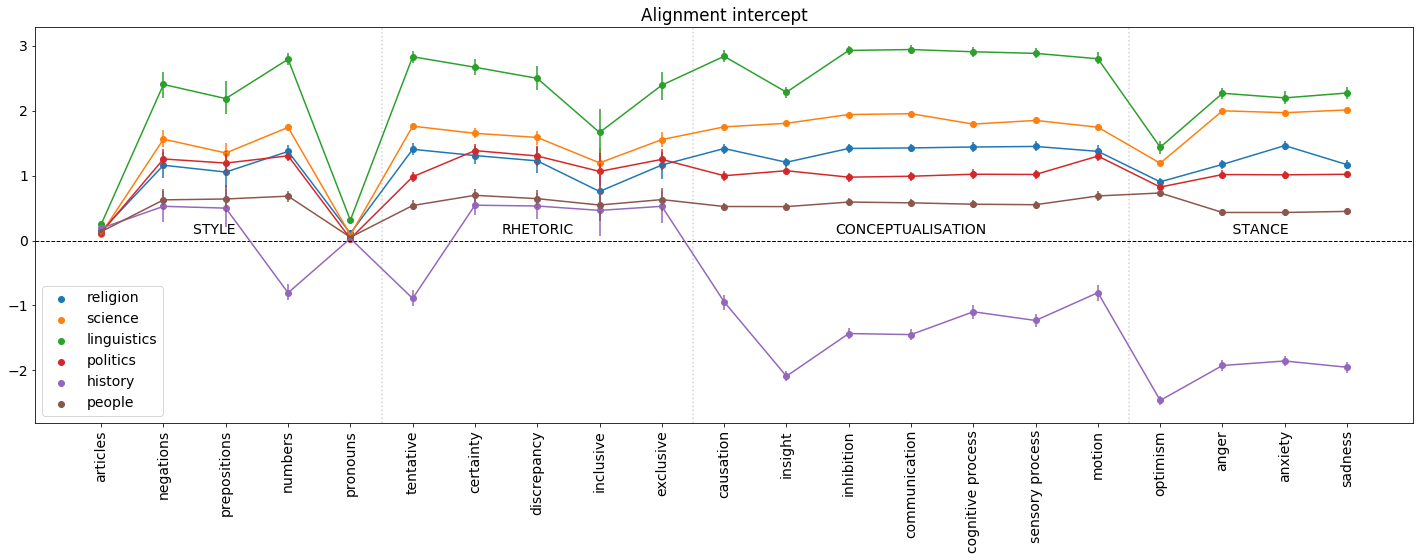

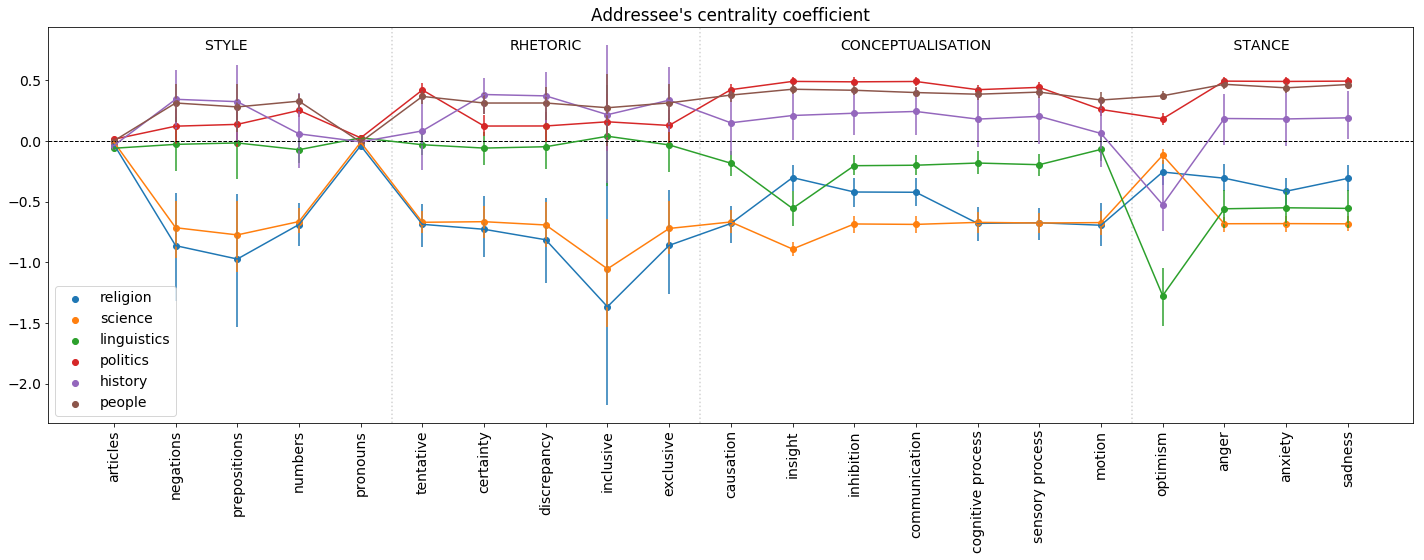

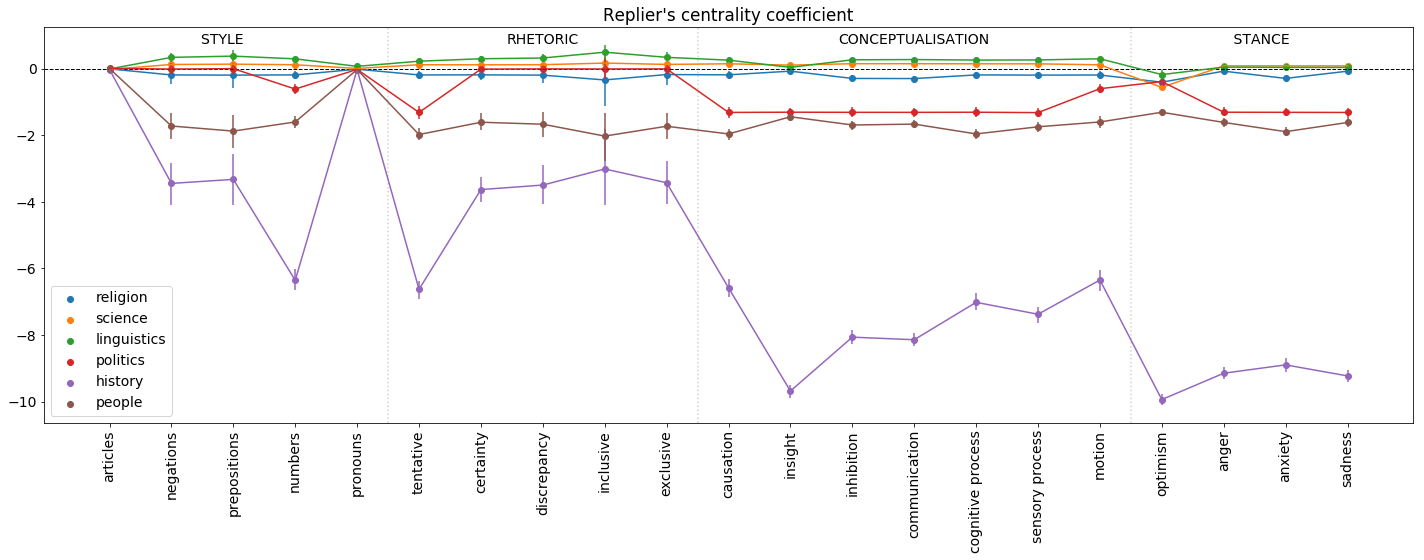

In [12]:
ALPHA = 0.025
fig, ax = plt.subplots(figsize=(20, 8))


for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/betweenness/{}-{}.csv'.format(TOPIC, CAT))
        
        mean = np.mean(trace['alignment intercept'])
        lo, hi = pm.stats.hpd(trace['alignment intercept'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title('Alignment intercept')
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.1
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('betwee_alignment_intercept.pdf')


fig, ax = plt.subplots(figsize=(20, 8))

for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/betweenness/{}-{}.csv'.format(TOPIC, CAT))

        mean = np.mean(trace['coefficient centr(A)'])
        lo, hi = pm.stats.hpd(trace['coefficient centr(A)'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title("Addressee's centrality coefficient")
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.75
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('betwee_alignment_addressee.pdf')



fig, ax = plt.subplots(figsize=(20, 8))

for c, TOPIC in enumerate(TOPICS):    
    means = np.zeros((len(CATEGORY_LIST)))
    intervals = np.zeros((2, len(CATEGORY_LIST)))
    
    for i, CAT in enumerate(CATEGORY_LIST):
        trace = pd.read_csv('./traces/category/betweenness/{}-{}.csv'.format(TOPIC, CAT))
    
        mean = np.mean(trace['coefficient centr(B)'])
        lo, hi = pm.stats.hpd(trace['coefficient centr(B)'], ALPHA)
        
        assert lo < mean < hi
        
        means[i] = mean
        intervals[0, i] = mean - lo
        intervals[1, i] = hi - mean
    
    ax.scatter(CATEGORY_LIST, means, label=TOPIC)
    ax.errorbar(CATEGORY_LIST, means, intervals)
    

plt.title("Replier's centrality coefficient")
ax.legend(loc=3)
plt.xticks(rotation=90)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.axvline(x=4.5, linestyle=':', color='lightgrey')
ax.axvline(x=9.5, linestyle=':', color='lightgrey')
ax.axvline(x=16.5, linestyle=':', color='lightgrey')

y_ = 0.75
ax.text(x=1.75, y=y_, s='  STYLE', horizontalalignment='center')
ax.text(x=7, y=y_, s='RHETORIC', horizontalalignment='center')
ax.text(x=13, y=y_, s='CONCEPTUALISATION', horizontalalignment='center')
ax.text(x=18.5, y=y_, s='   STANCE', horizontalalignment='center');

plt.tight_layout()
plt.savefig('betwee_alignment_replier.pdf')


In [13]:
TOPICS = [
          'religion',
          
          'politics', 
          'science', 
#           'history', 
          'people',
#           'philosophy', 
#           'sports',
#           'linguistics', 
#           'psychiatry',
#           'environment'
]



def predict(c1, c2, b0=base_0, a0=align_0, a1=align_1, a2=align_2):
    y = b0 + a0 + a1*c1 + a2*c2
    return 1 / (1 + np.exp(-y))


for i, CAT in enumerate(CATEGORY_LIST):
    fig, ax = plt.subplots(2, 2, figsize=(20, 8))
    

    for c, TOPIC in enumerate(TOPICS):    
        trace = pd.read_csv('./traces/category/eigenvector/{}-{}.csv'.format(TOPIC, CAT))
        base_0 = np.mean(trace['baseline intercept'])
        align_0 = np.mean(trace['alignment intercept'])
        align_1 = np.mean(trace['coefficient centr(A)'])
        align_2 = np.mean(trace['coefficient centr(B)'])


        c_a = np.linspace(0, 1, 100)
        c_b = np.linspace(0, 1, 100)

        X, Y = np.meshgrid(c_a, c_b)
        Z = predict(X, Y, b0=base_0, a0=align_0, a1=align_1, a2=align_2)

        plt.subplot(2,2, c+1)

        plt.xlabel("Replier's centrality")
        plt.ylabel("Addressee's centrality")
        plt.title(TOPIC)


    #     contours = plt.contour(X, Y, Z, 6, colors='black')
    #     plt.clabel(contours, inline=True, fontsize=8)

        plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='afmhot')

        plt.colorbar();
    plt.tight_layout()
    fig.suptitle(CAT, fontsize=16)
    fig.subplots_adjust(top=0.88)
    plt.show();
    

NameError: name 'base_0' is not defined

In [ ]:
TOPICS = [
          'religion',
          'science',
          'linguistics',
          'politics', 
          'history', 
          'people',
#           'philosophy', 
#           'sports',
#           'linguistics', 
#           'psychiatry',
#           'environment'
]

def predict(s_ab, b0=base_0, a0=align_0, a1=align_1):
    y = b0 + a0 + a1*s_ab
    return 1 / (1 + np.exp(-y))


for i, CAT in enumerate(CATEGORY_LIST):
    fig, ax = plt.subplots(2, 3, figsize=(20, 8))
    

    for c, TOPIC in enumerate(TOPICS):    
        trace = pd.read_csv('./traces/category/tiestrength/{}-{}.csv'.format(TOPIC, CAT))
        base_0 = np.mean(trace['baseline intercept'])
        align_0 = np.mean(trace['alignment intercept'])
        align_1 = np.mean(trace['coefficient tie-strength'])


        s_ab = np.linspace(0, 1, 100)

        y = predict(s_ab, b0=base_0, a0=align_0, a1=align_1)

        plt.subplot(2, 3, c+1)

#         plt.xlabel("Replier's centrality")
#         plt.ylabel("Addressee's centrality")
        plt.title(TOPIC)

        plt.plot(np.log(s_ab), np.log(y))
        
    plt.tight_layout()
    fig.suptitle(CAT, fontsize=16)
    fig.subplots_adjust(top=0.88)
    plt.show();
    

In [ ]:
TOPICS = [
          'religion',
          'science',
          'linguistics',
          'politics', 
          'history', 
          'people',
#           'philosophy', 
#           'sports',
#           'linguistics', 
#           'psychiatry',
#           'environment'
]

def predict(s_ab, b0=base_0, a0=align_0, a1=align_1):
    y = b0 + a0 + a1*s_ab
    return 1 / (1 + np.exp(-y))


for i, CAT in enumerate(CATEGORY_LIST):
    fig, ax = plt.subplots(2, 3, figsize=(20, 8))
    

    for c, TOPIC in enumerate(TOPICS):    
        trace = pd.read_csv('./traces/category/tiestrength/{}-{}.csv'.format(TOPIC, CAT))
        base_0 = np.mean(trace['baseline intercept'])
        align_0 = np.mean(trace['alignment intercept'])
        align_1 = np.mean(trace['coefficient tie-strength'])


        s_ab = np.linspace(0, 1, 100)

        y = predict(s_ab, b0=base_0, a0=align_0, a1=align_1)

        plt.subplot(2, 3, c+1)

#         plt.xlabel("Replier's centrality")
#         plt.ylabel("Addressee's centrality")
        plt.title(TOPIC)

        plt.plot(np.log(s_ab), np.log(y))
        
    plt.tight_layout()
    fig.suptitle(CAT, fontsize=16)
    fig.subplots_adjust(top=0.88)
    plt.show();
    